In [2]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import shutil
import os

In [6]:
base_path = 'samples'
raw_base = 'Raw_Audio'
raw_path = os.listdir('Raw_Audio/')

In [5]:
raw_path

['Clap', 'Cymbals', 'Hat', 'Kick', 'Snare']

In [15]:
data = {'file_path':[], "label":[]}
for raw in raw_path:
    samples = os.listdir(os.path.join(raw_base, raw))
    for i, path in enumerate(samples):
        file_name = raw+'_{}'.format(i)+'.wav'
        old_path = raw_base + '/' + raw + '/' + path
        new_path = base_path + '/' + raw+'_{}'.format(i) + '.wav'
        
        shutil.move(old_path, new_path)
        data['file_path'].append(new_path)
        data['label'].append(raw)
        
    print(file_name)
    print(old_path)
    print(new_path)

Clap_1069.wav
Raw_Audio/Clap/VMH2 Claps 215 -4ms.wav
samples/Clap_1069.wav
Cymbals_531.wav
Raw_Audio/Cymbals/VTDS3 Crash 25.wav
samples/Cymbals_531.wav
Hat_1029.wav
Raw_Audio/Hat/VMH2 Open Hihat 100.wav
samples/Hat_1029.wav
Kick_1087.wav
Raw_Audio/Kick/VMH2 Bassdrum 204.wav
samples/Kick_1087.wav
Snare_1047.wav
Raw_Audio/Snare/VMH2 Snares 188 -9ms.wav
samples/Snare_1047.wav


In [16]:
data

{'file_path': ['samples/Clap_0.wav',
  'samples/Clap_1.wav',
  'samples/Clap_2.wav',
  'samples/Clap_3.wav',
  'samples/Clap_4.wav',
  'samples/Clap_5.wav',
  'samples/Clap_6.wav',
  'samples/Clap_7.wav',
  'samples/Clap_8.wav',
  'samples/Clap_9.wav',
  'samples/Clap_10.wav',
  'samples/Clap_11.wav',
  'samples/Clap_12.wav',
  'samples/Clap_13.wav',
  'samples/Clap_14.wav',
  'samples/Clap_15.wav',
  'samples/Clap_16.wav',
  'samples/Clap_17.wav',
  'samples/Clap_18.wav',
  'samples/Clap_19.wav',
  'samples/Clap_20.wav',
  'samples/Clap_21.wav',
  'samples/Clap_22.wav',
  'samples/Clap_23.wav',
  'samples/Clap_24.wav',
  'samples/Clap_25.wav',
  'samples/Clap_26.wav',
  'samples/Clap_27.wav',
  'samples/Clap_28.wav',
  'samples/Clap_29.wav',
  'samples/Clap_30.wav',
  'samples/Clap_31.wav',
  'samples/Clap_32.wav',
  'samples/Clap_33.wav',
  'samples/Clap_34.wav',
  'samples/Clap_35.wav',
  'samples/Clap_36.wav',
  'samples/Clap_37.wav',
  'samples/Clap_38.wav',
  'samples/Clap_39.wav

In [17]:
samples = os.listdir('samples/')

len(samples)

4768

In [26]:
df = pd.DataFrame(data)

df.to_csv('data.csv', index=False)

In [27]:
from sklearn.model_selection import train_test_split

In [41]:
sample_df = pd.read_csv('data.csv')

sample_df

,file_path,label
0,samples/Clap_0.wav,Clap
1,samples/Clap_1.wav,Clap
2,samples/Clap_2.wav,Clap
3,samples/Clap_3.wav,Clap
4,samples/Clap_4.wav,Clap
...,...,...
4763,samples/Snare_1043.wav,Snare
4764,samples/Snare_1044.wav,Snare
4765,samples/Snare_1045.wav,Snare
4766,samples/Snare_1046.wav,Snare


In [42]:
sample_x, sample_y = sample_df.iloc[:, :1], sample_df.iloc[:, 1:]

In [43]:
train_x, test_x, train_y, test_y = train_test_split(sample_x, sample_y, stratify=sample_y, random_state=17, test_size=0.075)

print(len(train_x))
print(len(test_x))

4410
358


In [44]:
train = pd.concat([train_x, train_y], axis=1)
train

,file_path,label
2131,samples/Hat_529.wav,Hat
4159,samples/Snare_439.wav,Snare
2864,samples/Kick_232.wav,Kick
3270,samples/Kick_638.wav,Kick
3666,samples/Kick_1034.wav,Kick
...,...,...
3097,samples/Kick_465.wav,Kick
2737,samples/Kick_105.wav,Kick
523,samples/Clap_523.wav,Clap
3490,samples/Kick_858.wav,Kick


In [45]:
test = pd.concat([test_x, test_y], axis=1)
test

,file_path,label
1959,samples/Hat_357.wav,Hat
3515,samples/Kick_883.wav,Kick
1567,samples/Cymbals_497.wav,Cymbals
3447,samples/Kick_815.wav,Kick
830,samples/Clap_830.wav,Clap
...,...,...
229,samples/Clap_229.wav,Clap
2742,samples/Kick_110.wav,Kick
1859,samples/Hat_257.wav,Hat
2688,samples/Kick_56.wav,Kick


In [46]:
train.to_csv('train.csv', index=False)
test.to_csv('test.csv', index=False)

In [170]:
label_tag = {'Hat': 0, 'Snare': 1, 'Kick': 2, 'Clap': 3, 'Cymbals': 4}

for i in range(len(test)):
    test['label'][i] = label_tag[test['label'][i]]

In [171]:
test

,file_path,label
0,samples/Hat_357.wav,0
1,samples/Kick_883.wav,2
2,samples/Cymbals_497.wav,4
3,samples/Kick_815.wav,2
4,samples/Clap_830.wav,3
...,...,...
353,samples/Clap_229.wav,3
354,samples/Kick_110.wav,2
355,samples/Hat_257.wav,0
356,samples/Kick_56.wav,2


## Mel-Spectrum

In [51]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [148]:
def Mel_S(wav_file):
    frame_length = 0.005
    frame_stride = 0.002
    
    # mel-spectrogram
    y, sr = librosa.load(wav_file, sr=16000)

    # wav_length = len(y)/sr
    input_nfft = int(round(sr*frame_length))
    input_stride = int(round(sr*frame_stride))

    S = librosa.feature.melspectrogram(y=y, n_mels=84, n_fft=input_nfft, hop_length=input_stride)

    print("Wav length: {}, Mel_S shape:{}".format(len(y)/sr,np.shape(S)))
    
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(librosa.power_to_db(S, ref=np.max), y_axis='mel', sr=sr, hop_length=input_stride, x_axis='time')
    plt.colorbar(format='%+2.0f dB')
    plt.title('Mel-Spectrogram')
    plt.tight_layout()
    plt.show()
    
#     plt.imshow(S)
#     plt.show()

    return S

In [167]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

File_Path : samples/Hat_529.wav
Label : Hat
Wav length: 0.011125, Mel_S shape:(84, 6)


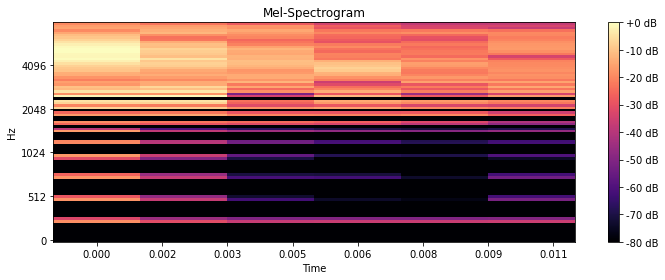

(84, 6)


In [150]:
idx = 0
print("File_Path :", train.iloc[idx][0])
print("Label :", train.iloc[idx][1])
s = Mel_S(train.iloc[idx][0])
print(s.shape)

In [154]:
from torchvision import transforms
import torchvision
import torch

In [155]:
resnet = torchvision.models.resnet50(pretrained=True)

In [159]:
i = torch.randn(4, 3, 84, 84)
o = resnet(i)

o.shape

torch.Size([4, 1000])

In [157]:
resnet.fc.in_features

2048